## Prerequisites


In [1]:
import dotenv

dotenv.load_dotenv()

True

In [2]:
project_name = "singer_age_decade_10"
encoder_id = "whisper_large_v2"


# data preparation
target_column = "singer_age_decade"
target_positive_class = 10


## 1. Train Multiple CAVs for Significance Test


In [3]:
# training meta parameters
num_train_runs = 10
training_sample_count = 100


# training parameters
epochs = 500
batch_size = training_sample_count
learning_rate = 0.002
embedding_dim = 1280
dropout_rate = 0.0

### Prepare Data


In [4]:
import os

import pandas as pd
import s3fs
from cavmir.training.dataset import (
    create_dataloader_from_webdataset_path,
    create_webdataset,
)
from cavmir.utils import (
    append_embeddings_to_df,
    create_training_samples_from_df,
    train_one_cav,
    store_cav_vector_array,
    store_evaluation_metrics,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


In [5]:
# load training set
df = pd.read_csv(os.path.join(dataset_prefix, f"train_dataset_{project_name}.csv"))
df = append_embeddings_to_df(df, embedding_prefix, encoder_id, s3)

In [6]:
# create test set for evaluation
df_test = pd.read_csv(os.path.join(dataset_prefix, f"test_dataset_{project_name}.csv"))
df_test = append_embeddings_to_df(df_test, embedding_prefix, encoder_id, s3)

create_webdataset(
    create_training_samples_from_df(df_test),
    f"datasets/{encoder_id}_test_{project_name}.tar",
)

test_dataloader = create_dataloader_from_webdataset_path(
    f"datasets/{encoder_id}_test_{project_name}.tar", batch_size=batch_size
)

### Training


Training run 1/10
Epoch 1/500
Epoch 1 Train Loss: 0.6937
Epoch 1 Validation Loss: 0.6877
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.6129
Epoch 11 Validation Loss: 0.6377
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.5556
Epoch 21 Validation Loss: 0.6136
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.5108
Epoch 31 Validation Loss: 0.5977
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.4732
Epoch 41 Validation Loss: 0.5879
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.4404
Epoch 51 Validation Loss: 0.5798
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 61/500
Epoch 61 Train Loss: 0.4113
Epoch 61 Validation Loss: 0.5725
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 71/500
Epoch 71 Train Loss: 0.3853

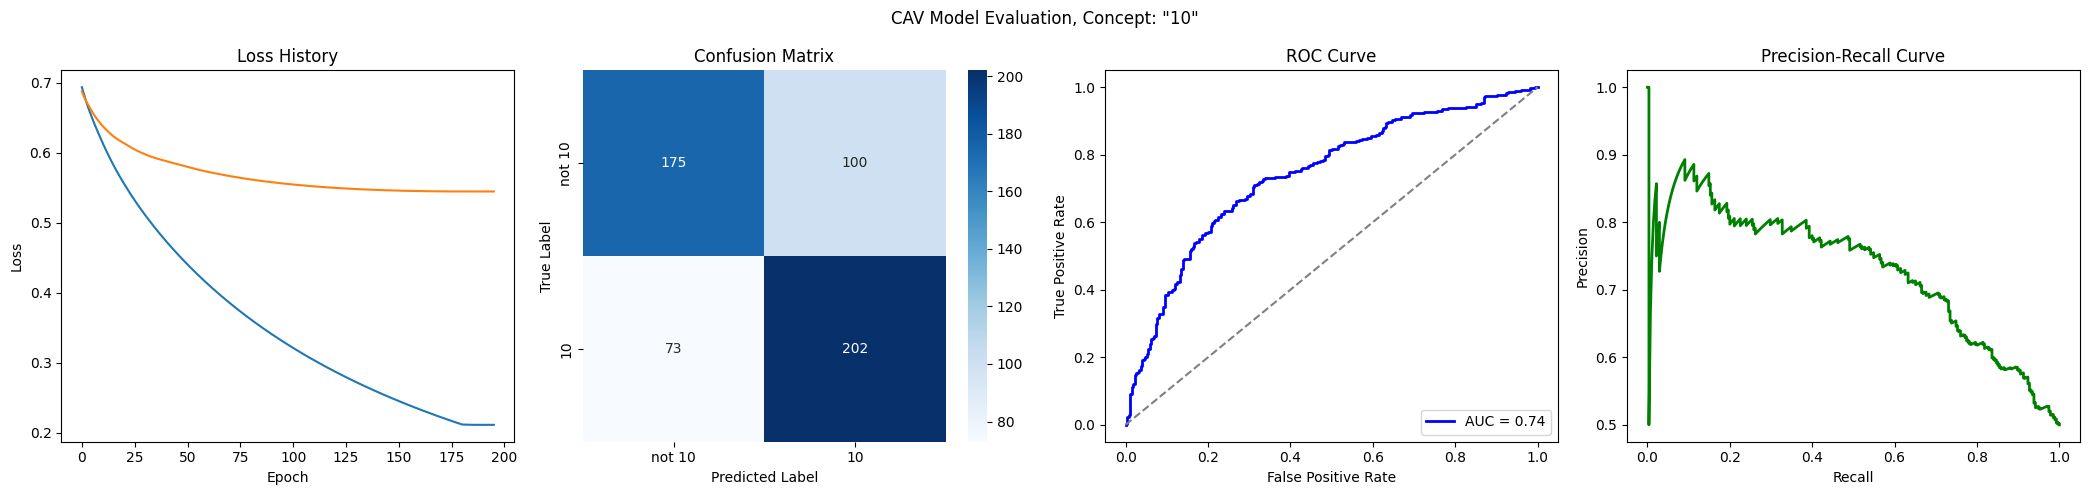

Training run 2/10
Epoch 1/500
Epoch 1 Train Loss: 0.6936
Epoch 1 Validation Loss: 0.6933
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.5993
Epoch 11 Validation Loss: 0.6778
Early stopping at epoch 19
Loss history saved to trainings/singer_age_decade_10/loss_history.json


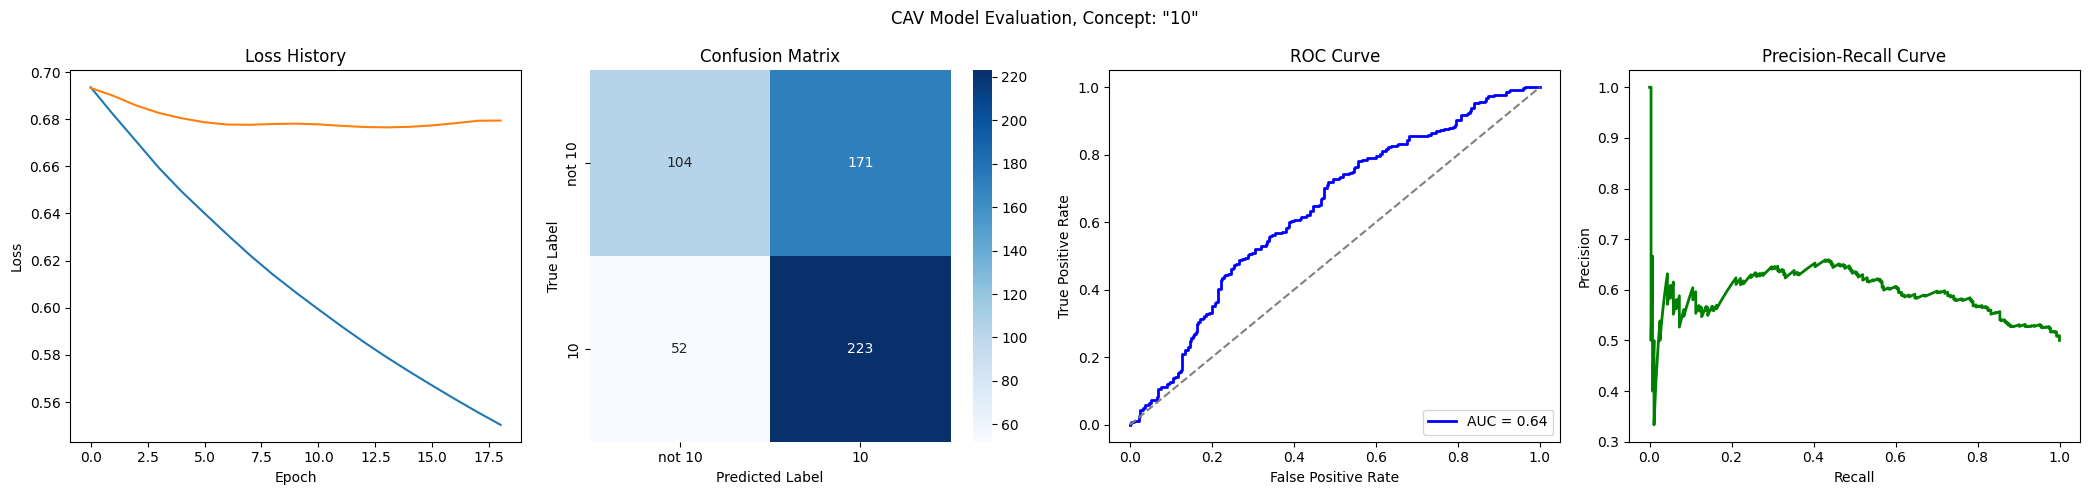

Training run 3/10
Epoch 1/500
Epoch 1 Train Loss: 0.7021
Epoch 1 Validation Loss: 0.6967
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.5969
Epoch 11 Validation Loss: 0.6717
Model saved to trainings/singer_age_decade_10/state_dict.pth
Early stopping at epoch 17
Loss history saved to trainings/singer_age_decade_10/loss_history.json


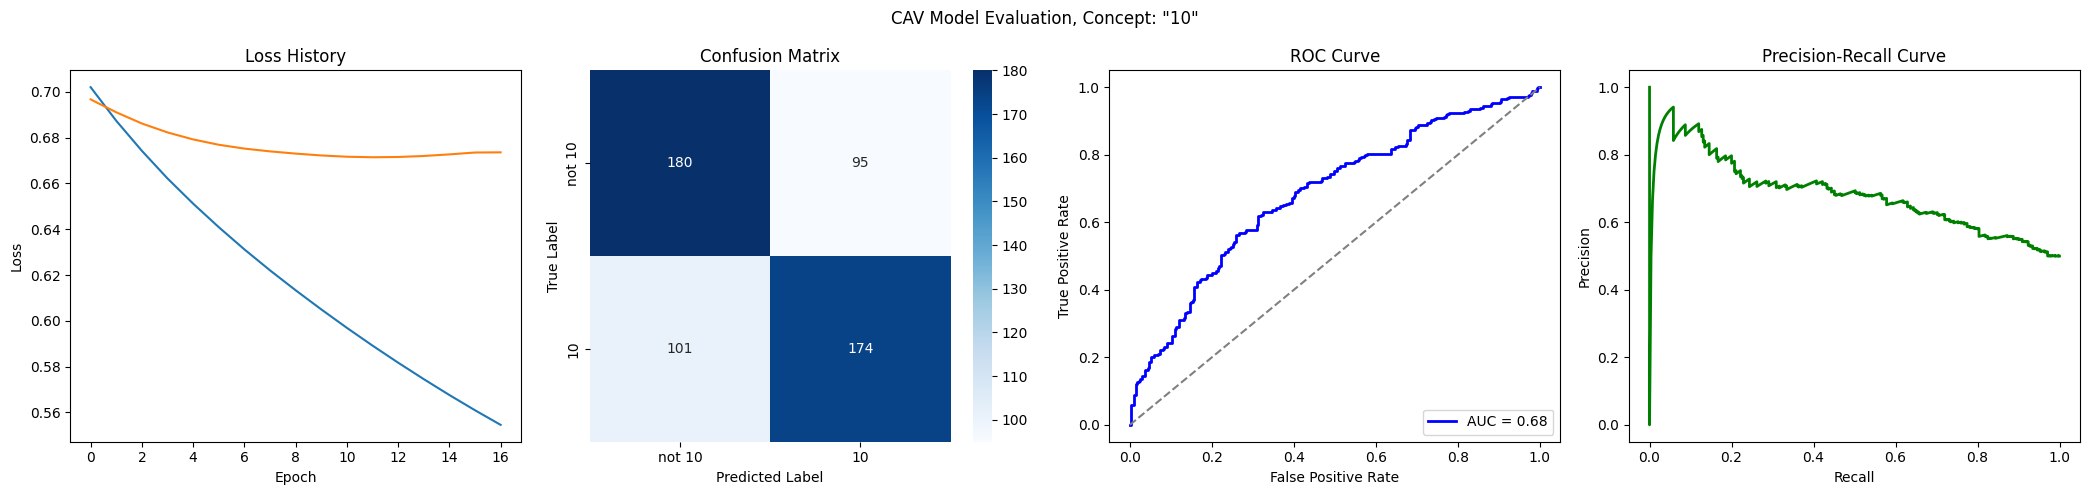

Training run 4/10
Epoch 1/500
Epoch 1 Train Loss: 0.6989
Epoch 1 Validation Loss: 0.6921
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.6108
Epoch 11 Validation Loss: 0.6658
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.5575
Epoch 21 Validation Loss: 0.6574
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.5162
Epoch 31 Validation Loss: 0.6428
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.4800
Epoch 41 Validation Loss: 0.6250
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.4482
Epoch 51 Validation Loss: 0.6122
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 61/500
Epoch 61 Train Loss: 0.4198
Epoch 61 Validation Loss: 0.6052
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 71/500
Epoch 71 Train Loss: 0.3943

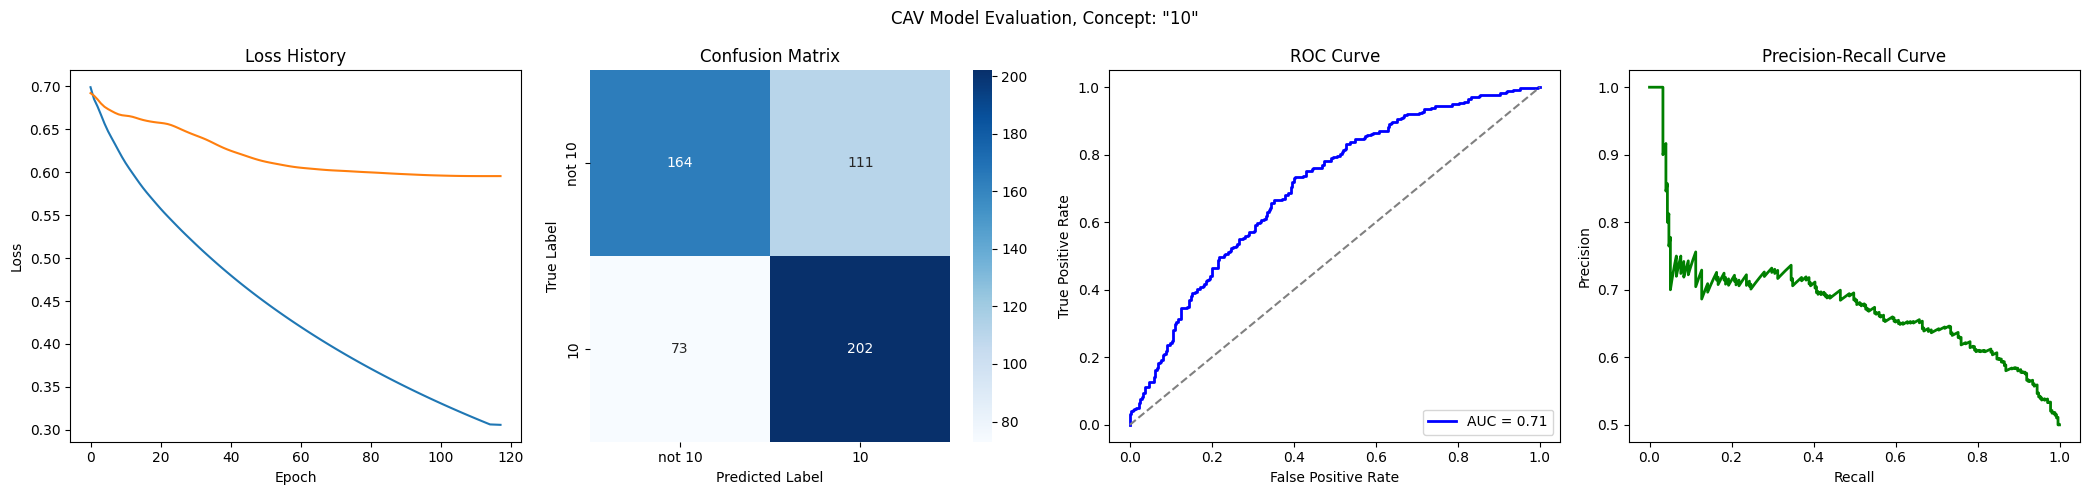

Training run 5/10
Epoch 1/500
Epoch 1 Train Loss: 0.6951
Epoch 1 Validation Loss: 0.6878
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.5919
Epoch 11 Validation Loss: 0.6438
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.5235
Epoch 21 Validation Loss: 0.6294
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.4731
Epoch 31 Validation Loss: 0.6256
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.4315
Epoch 41 Validation Loss: 0.6237
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.3987
Epoch 51 Validation Loss: 0.6231
Early stopping at epoch 52
Loss history saved to trainings/singer_age_decade_10/loss_history.json


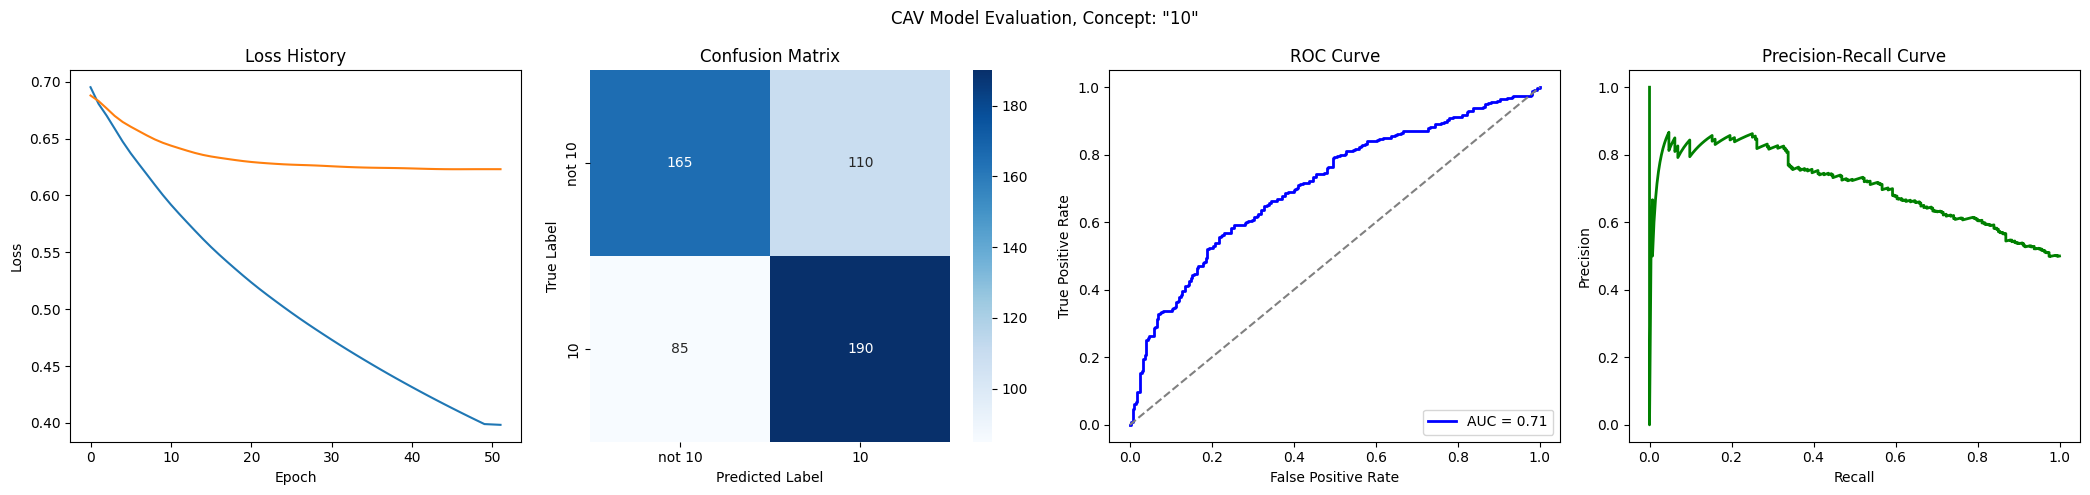

Training run 6/10
Epoch 1/500
Epoch 1 Train Loss: 0.6996
Epoch 1 Validation Loss: 0.6883
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.6107
Epoch 11 Validation Loss: 0.6353
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.5487
Epoch 21 Validation Loss: 0.6031
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.5000
Epoch 31 Validation Loss: 0.5881
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.4597
Epoch 41 Validation Loss: 0.5825
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.4253
Epoch 51 Validation Loss: 0.5806
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 61/500
Epoch 61 Train Loss: 0.3954
Epoch 61 Validation Loss: 0.5803
Early stopping at epoch 65
Loss history saved to trainings/singer_age_decade_10/loss_history.json


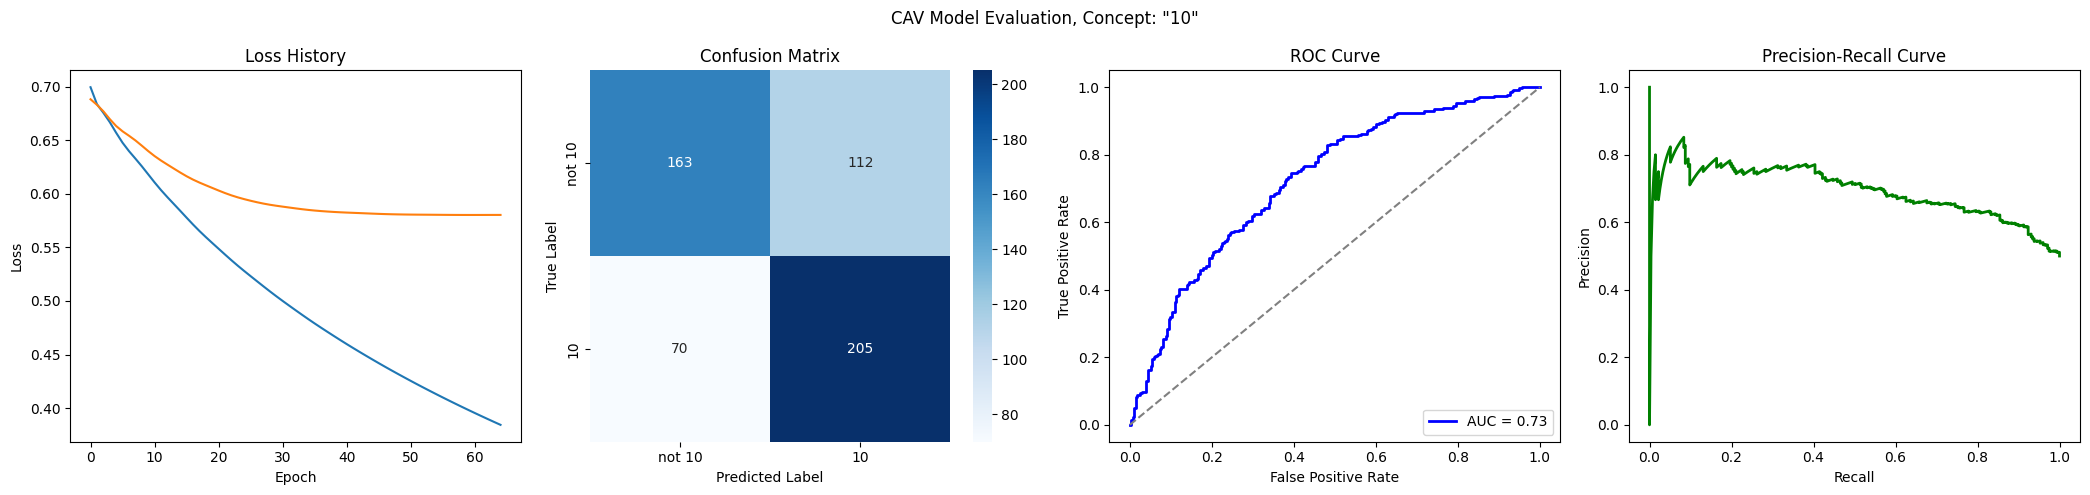

Training run 7/10
Epoch 1/500
Epoch 1 Train Loss: 0.6923
Epoch 1 Validation Loss: 0.6884
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.6314
Epoch 11 Validation Loss: 0.6466
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.5811
Epoch 21 Validation Loss: 0.6179
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.5377
Epoch 31 Validation Loss: 0.6023
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.5000
Epoch 41 Validation Loss: 0.5914
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.4668
Epoch 51 Validation Loss: 0.5832
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 61/500
Epoch 61 Train Loss: 0.4372
Epoch 61 Validation Loss: 0.5775
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 71/500
Epoch 71 Train Loss: 0.4104

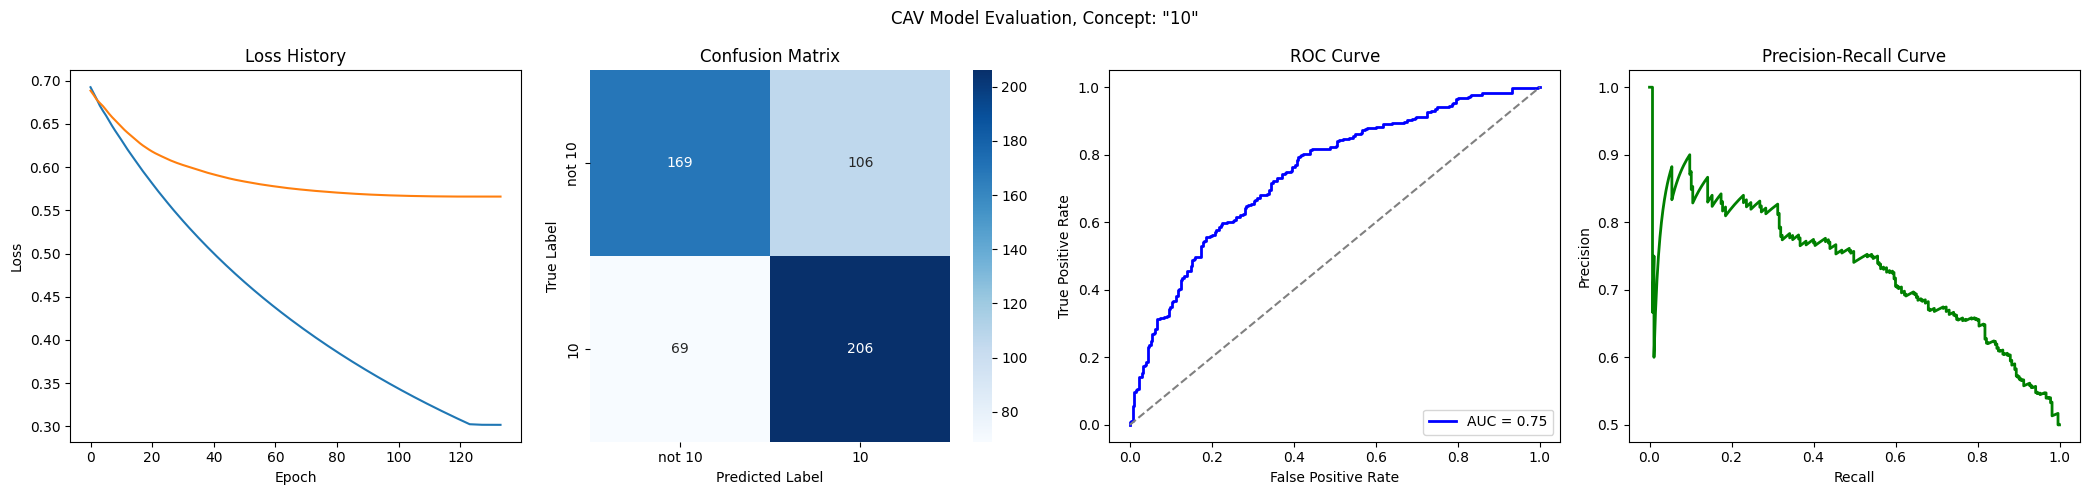

Training run 8/10
Epoch 1/500
Epoch 1 Train Loss: 0.6999
Epoch 1 Validation Loss: 0.6951
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.6180
Epoch 11 Validation Loss: 0.6547
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.5573
Epoch 21 Validation Loss: 0.6337
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.5095
Epoch 31 Validation Loss: 0.6283
Early stopping at epoch 34
Loss history saved to trainings/singer_age_decade_10/loss_history.json


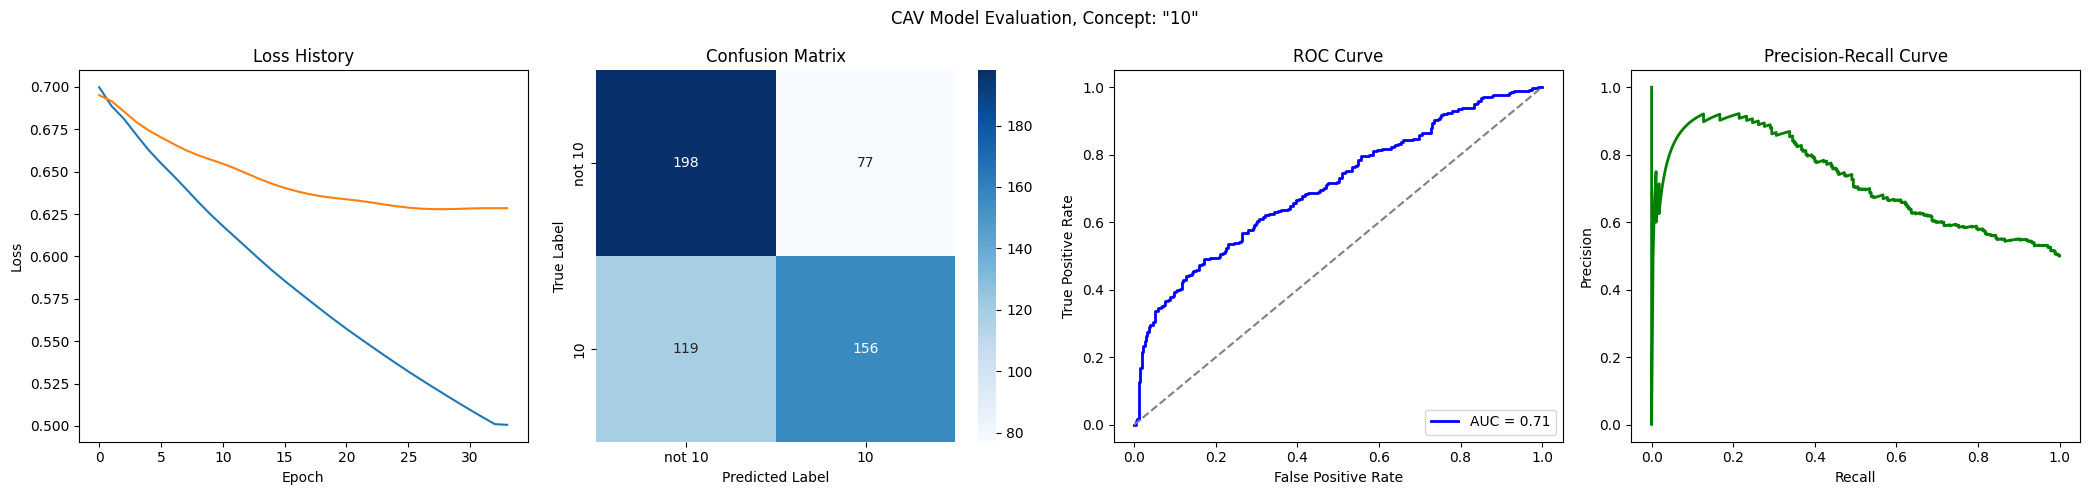

Training run 9/10
Epoch 1/500
Epoch 1 Train Loss: 0.6976
Epoch 1 Validation Loss: 0.6934
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.6314
Epoch 11 Validation Loss: 0.6542
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.5763
Epoch 21 Validation Loss: 0.6258
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.5297
Epoch 31 Validation Loss: 0.6098
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.4894
Epoch 41 Validation Loss: 0.5987
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.4541
Epoch 51 Validation Loss: 0.5908
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 61/500
Epoch 61 Train Loss: 0.4227
Epoch 61 Validation Loss: 0.5865
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 71/500
Epoch 71 Train Loss: 0.3945

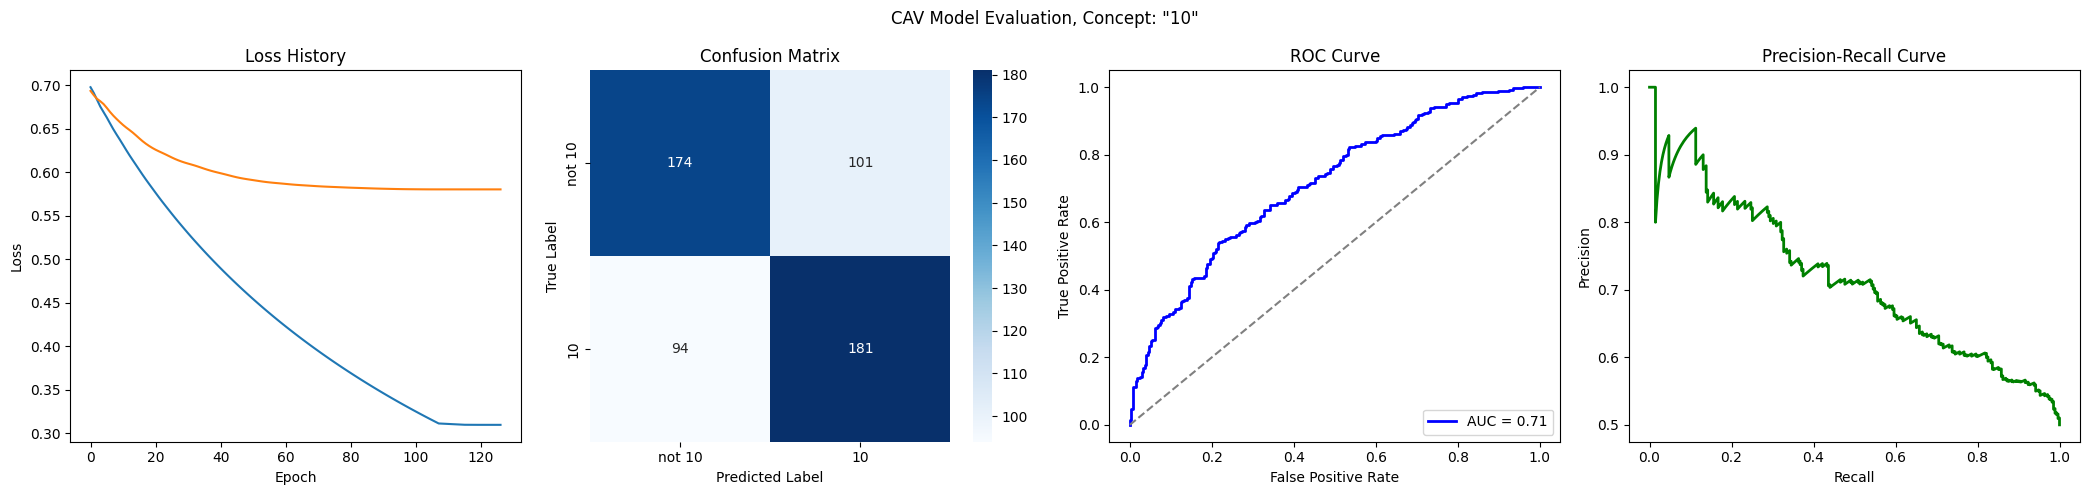

Training run 10/10
Epoch 1/500
Epoch 1 Train Loss: 0.7067
Epoch 1 Validation Loss: 0.6947
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.6165
Epoch 11 Validation Loss: 0.6582
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.5540
Epoch 21 Validation Loss: 0.6344
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.5069
Epoch 31 Validation Loss: 0.6191
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.4683
Epoch 41 Validation Loss: 0.6120
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.4362
Epoch 51 Validation Loss: 0.6083
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 61/500
Epoch 61 Train Loss: 0.4082
Epoch 61 Validation Loss: 0.6054
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 71/500
Epoch 71 Train Loss: 0.383

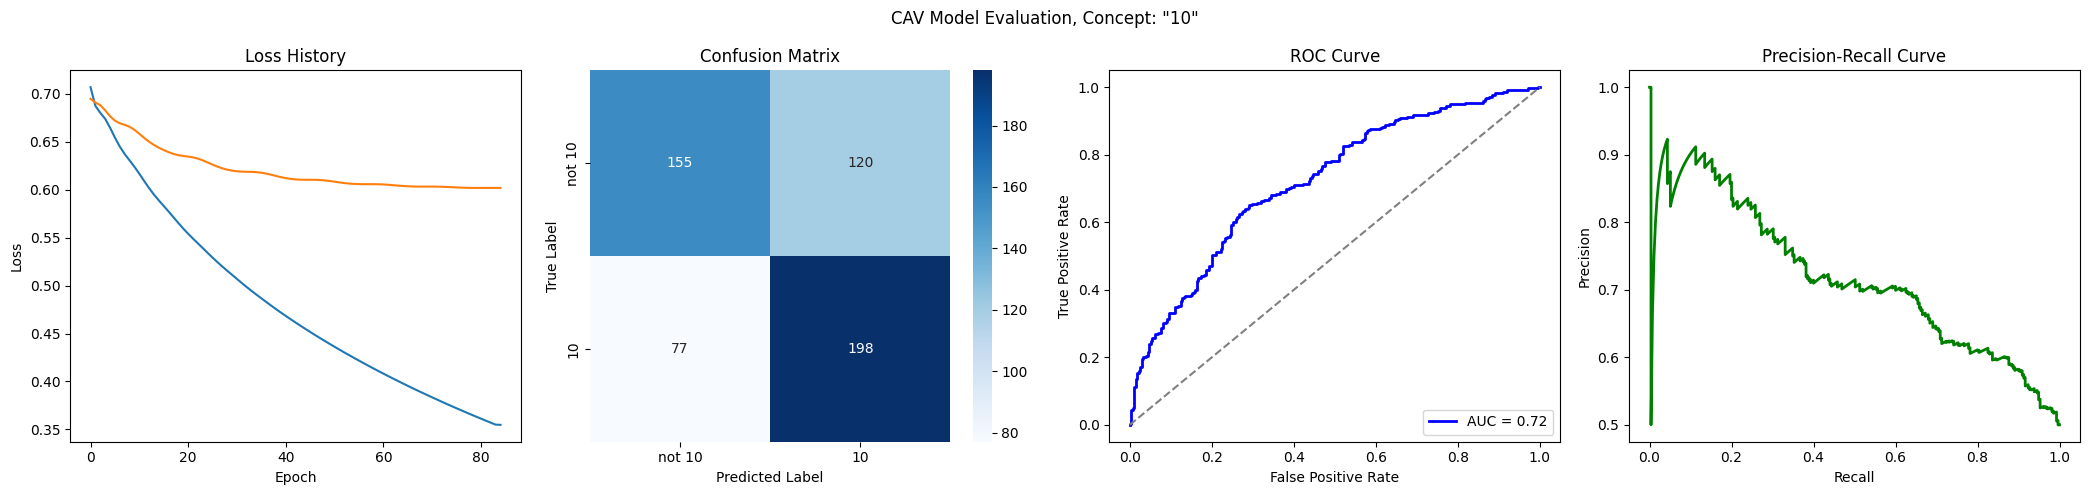

CPU times: user 2min 3s, sys: 43.3 s, total: 2min 47s
Wall time: 3min 37s


In [7]:
%%time

cav_vectors = []
evaluation_metrics = []

for i in range(num_train_runs):
    print(f"Training run {i + 1}/{num_train_runs}")

    cav_vector, evaluation_metric = train_one_cav(
        train_index=i,
        df=df,
        project_name=project_name,
        encoder_id=encoder_id,
        target_column=target_column,
        target_positive_class=target_positive_class,
        training_sample_count=training_sample_count,
        epochs=epochs,
        batch_size=batch_size,
        learning_rate=learning_rate,
        embedding_dim=embedding_dim,
        dropout_rate=dropout_rate,
        test_dataloader=test_dataloader,
    )

    cav_vectors.append(cav_vector)
    evaluation_metrics.append(evaluation_metric)


store_cav_vector_array(cav_vectors, f"cav_ttest_{project_name}.npy", project_name)
store_evaluation_metrics(
    evaluation_metrics, f"evaluation_metrics_ttest_{project_name}.json", project_name
)


## 2. Train CAV for Qualitative Tests


In [8]:
train_val_split = 0.9

# training parameters
epochs = 500
batch_size = 128
learning_rate = 0.002
embedding_dim = 1280
dropout_rate = 0.0

### Prepare Data


In [9]:
import os

import pandas as pd
import s3fs
from cavmir.training.dataset import (
    create_dataloader_from_webdataset_path,
    create_webdataset,
)
from cavmir.utils import (
    append_embeddings_to_df,
    create_training_samples_from_df,
    train_one_cav,
    store_cav_vector_array,
    store_evaluation_metrics,
)

s3 = s3fs.S3FileSystem(anon=False)

dataset_prefix = os.environ["DATASET_PREFIX"]
embedding_prefix = os.environ["EMBEDDING_PREFIX"]


In [12]:
# load training set
df = pd.read_csv(os.path.join(dataset_prefix, f"train_dataset_{project_name}.csv"))
df = append_embeddings_to_df(df, embedding_prefix, encoder_id, s3)

training_sample_count = int(len(df) * train_val_split)
validation_sample_count = len(df) - training_sample_count


In [14]:
validation_sample_count

30

In [15]:
# create test set for evaluation
df_test = pd.read_csv(os.path.join(dataset_prefix, f"test_dataset_{project_name}.csv"))
df_test = append_embeddings_to_df(df_test, embedding_prefix, encoder_id, s3)

create_webdataset(
    create_training_samples_from_df(df_test),
    f"datasets/{encoder_id}_test_{project_name}.tar",
)

test_dataloader = create_dataloader_from_webdataset_path(
    f"datasets/{encoder_id}_test_{project_name}.tar", batch_size=batch_size
)

### Training


Epoch 1/500
Epoch 1 Train Loss: 0.6883
Epoch 1 Validation Loss: 0.6925
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.5555
Epoch 11 Validation Loss: 0.6279
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.4897
Epoch 21 Validation Loss: 0.5947
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.4445
Epoch 31 Validation Loss: 0.5724
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.4106
Epoch 41 Validation Loss: 0.5581
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.3836
Epoch 51 Validation Loss: 0.5484
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 61/500
Epoch 61 Train Loss: 0.3613
Epoch 61 Validation Loss: 0.5412
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 71/500
Epoch 71 Train Loss: 0.3422
Epoch 71 Validati

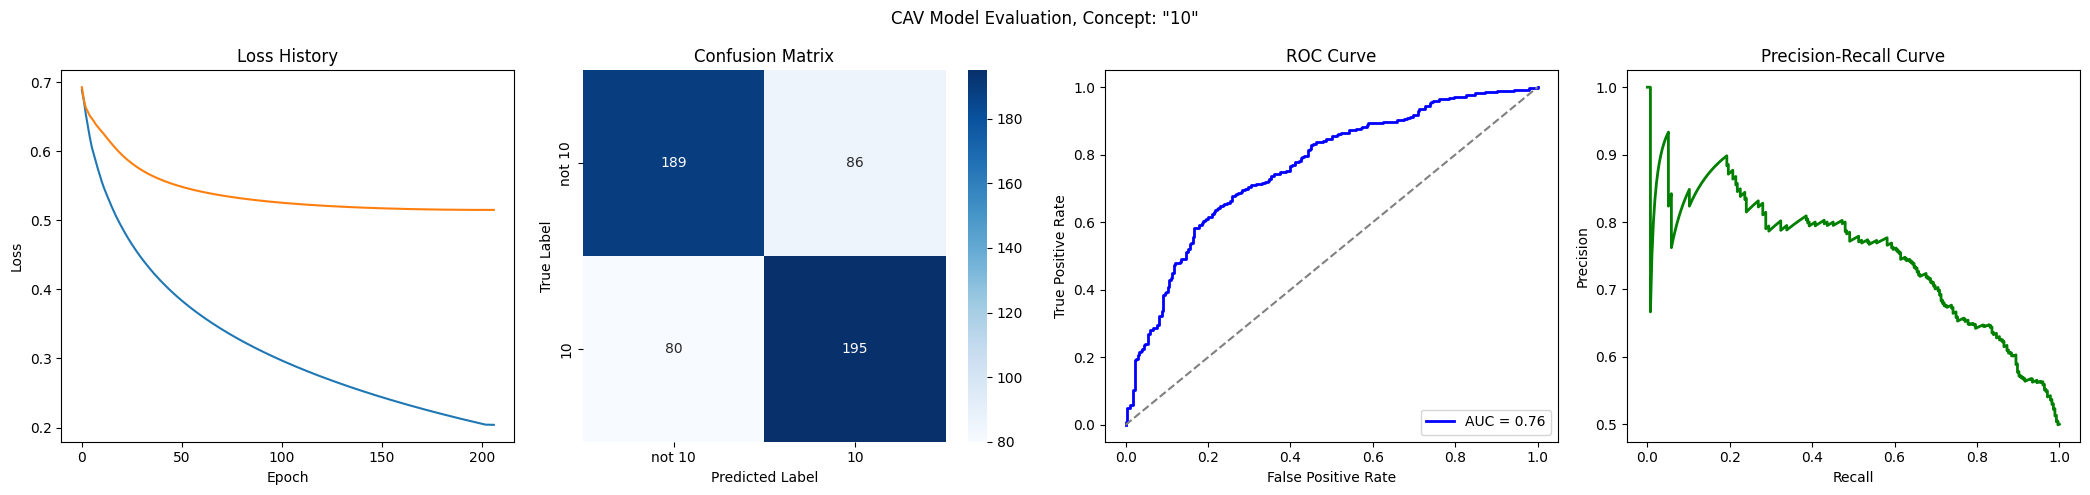

Epoch 1/500
Epoch 1 Train Loss: 0.6898
Epoch 1 Validation Loss: 0.6843
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 11/500
Epoch 11 Train Loss: 0.5717
Epoch 11 Validation Loss: 0.6182
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 21/500
Epoch 21 Train Loss: 0.5016
Epoch 21 Validation Loss: 0.5896
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 31/500
Epoch 31 Train Loss: 0.4533
Epoch 31 Validation Loss: 0.5738
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 41/500
Epoch 41 Train Loss: 0.4172
Epoch 41 Validation Loss: 0.5627
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 51/500
Epoch 51 Train Loss: 0.3886
Epoch 51 Validation Loss: 0.5538
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 61/500
Epoch 61 Train Loss: 0.3651
Epoch 61 Validation Loss: 0.5464
Model saved to trainings/singer_age_decade_10/state_dict.pth
Epoch 71/500
Epoch 71 Train Loss: 0.3451
Epoch 71 Validati

KeyboardInterrupt: 

In [ ]:
cav_vector, evaluation_metric = train_one_cav(
    train_index=0,
    df=df,
    project_name=project_name,
    encoder_id=encoder_id,
    target_column=target_column,
    target_positive_class=target_positive_class,
    training_sample_count=training_sample_count,
    validation_sample_count=validation_sample_count,
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=learning_rate,
    embedding_dim=embedding_dim,
    dropout_rate=dropout_rate,
    test_dataloader=test_dataloader,
)


store_cav_vector_array(cav_vector, f"cav_full_{project_name}.npy", project_name)
store_evaluation_metrics(
    evaluation_metric, f"evaluation_metrics_full_{project_name}.json", project_name
)
